# Zomato data analysis project



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating data frame

In [2]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Converting the data type of the "rate" column into float and removing the denominator

In [5]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# Summary of the data frame

In [7]:
dataframe.info() #checking if there is any missing value in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Conclusion - There is no NULL value in the dataframe.

## Type of Resturant

In [8]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'No. of restaurant')

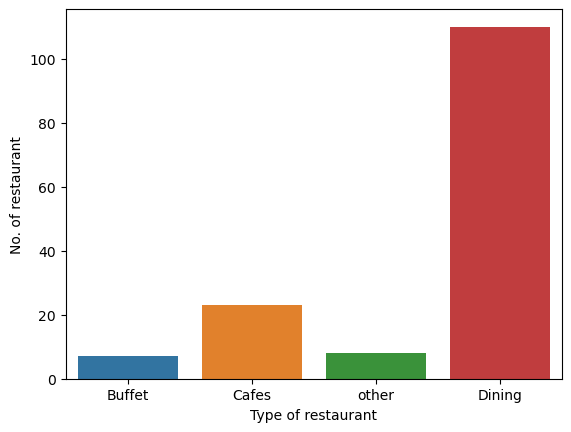

In [10]:
# now we are building bar graph

sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")
plt.ylabel("No. of restaurant")

## Conclusion: The majority of the restaurants fall into the dining category.

    
## Dining restaurants are preferred by a larger number of individuals.    

In [11]:
# 2. How many votes has each type of restaurant received from customers?



In [12]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

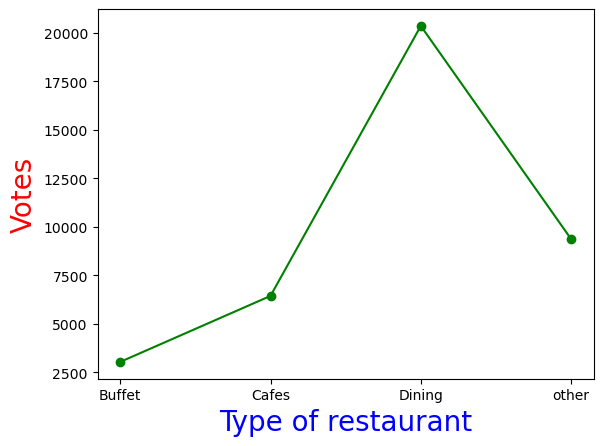

In [15]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="blue", size=20)
plt.ylabel("Votes", c="red", size=20)

## conclusion - dining restaurants has received maximum votes

In [16]:
# 3. What are the ratings that the majority of restaurants have received?

In [17]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


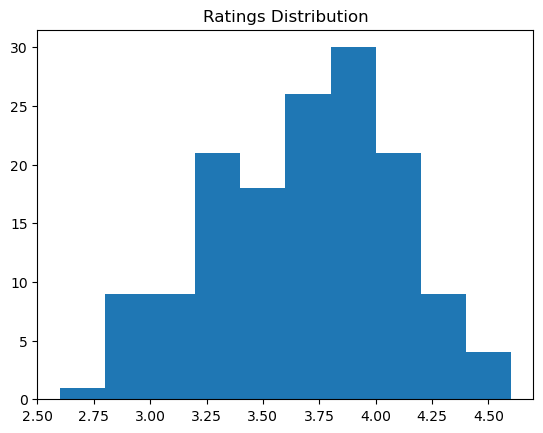

In [22]:
plt.hist(dataframe['rate'], bins=10)
plt.title("Ratings Distribution")
plt.show()

## Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.


# Average order spending by couples

In [23]:
# 4. Zomato has obeserved that most couples order most of their food online. What is their average spending on each order?

In [24]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

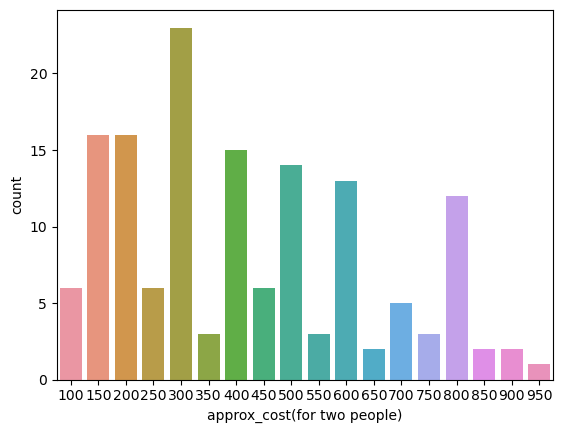

In [25]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

## Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

# Which mode receives maximum rating

In [26]:
# 5. Which mode (online or offline) has received the maximum rating?

In [27]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

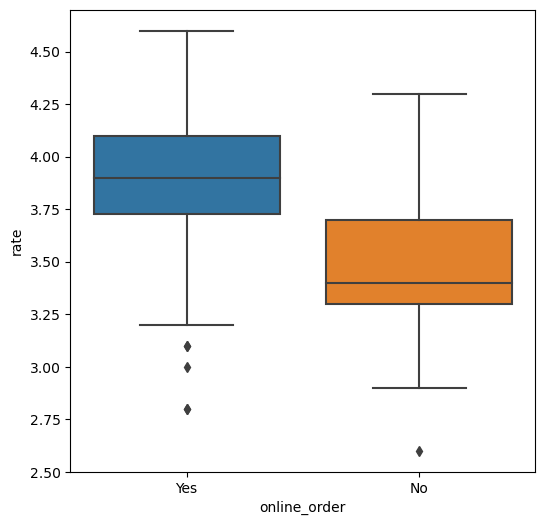

In [28]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

## Conclusion: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

In [29]:
# 6. Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

In [30]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


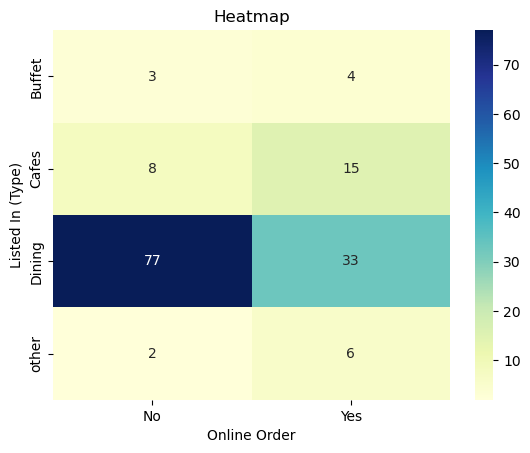

In [40]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

## Conclusion: Dining restaurants primarily accept offlice orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.